<a href="https://colab.research.google.com/github/MFRoz1/Define-Optimal-Models-for-Bank-Churners/blob/main/BankChurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [ ]:
from google.colab import files
upload = files.upload()

Saving BankChurners.csv to BankChurners.csv


# **EDA**

In [ ]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
print(df.shape)

(10127, 23)


In [ ]:
#menghapus 2 kolom terakhir menggunakan fungsi drop

df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis = 1, inplace = True)

In [ ]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#checking for duplicates

df[df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [ ]:
list(df.select_dtypes(['object']).columns)

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

# **Preprocessing**

**Feature Encoding**

In [ ]:
# Mengganti nilai variable pada kolom Attrition_Flag

df = df.replace({'Attrition_Flag':{'Existing Customer':0, 'Attrited Customer':1}})

In [ ]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
#encoding categorical features
le = LabelEncoder()

df['Gender'] = le.fit_transform(df.Gender)
df['Education_Level'] = le.fit_transform(df.Education_Level)
df['Marital_Status'] = le.fit_transform(df.Marital_Status)
df['Income_Category'] = le.fit_transform(df.Income_Category)
df['Card_Category'] = le.fit_transform(df.Card_Category)

In [ ]:
#Mengecek apakah masih ada kolom bertipe object
df.select_dtypes('object').columns.any()

False

In [ ]:
pd.set_option('display.max_columns', None )
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


**Feature Selection**

In [ ]:
#Untuk mengetahui nilai korelasi antar kolom
cor = df.corr()
cor

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,-0.046430,0.007613,0.020188,0.006772,-0.003789,-0.003284,-0.025802,0.007511,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Attrition_Flag,-0.046430,1.000000,0.018203,-0.037272,0.018991,0.005551,0.018597,0.017584,-0.006038,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410
Customer_Age,0.007613,0.018203,1.000000,-0.017312,-0.122254,0.004083,-0.011265,-0.013474,-0.020131,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Gender,0.020188,-0.037272,-0.017312,1.000000,0.004563,0.000694,-0.000007,-0.539731,0.079203,-0.006728,0.003157,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Dependent_count,0.006772,0.018991,-0.122254,0.004563,1.000000,0.003788,0.000337,-0.035417,0.021674,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Education_Level,-0.003789,0.005551,0.004083,0.000694,0.003788,1.000000,0.014720,-0.010442,-0.007212,-0.004953,0.009636,-0.008077,0.008500,0.003076,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477
Marital_Status,-0.003284,0.018597,-0.011265,-0.000007,0.000337,0.014720,1.000000,0.009659,0.035947,-0.012084,-0.021393,0.001709,0.001476,0.031292,-0.025386,0.033562,-0.036210,0.044553,0.075888,0.000258,-0.027451
Income_Category,-0.025802,0.017584,-0.013474,-0.539731,-0.035417,-0.010442,0.009659,1.000000,-0.051632,-0.016375,0.008138,0.024037,-0.018367,-0.225394,-0.025815,-0.223033,-0.004534,-0.014686,0.033498,0.014892,0.123287
Card_Category,0.007511,-0.006038,-0.020131,0.079203,0.021674,-0.007212,0.035947,-0.051632,1.000000,-0.014749,-0.073770,-0.016816,-0.000919,0.484090,0.017027,0.482462,0.004061,0.176377,0.116579,-0.004541,-0.205089
Months_on_book,0.134588,0.013687,0.788912,-0.006728,-0.103062,-0.004953,-0.012084,-0.016375,-0.014749,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541


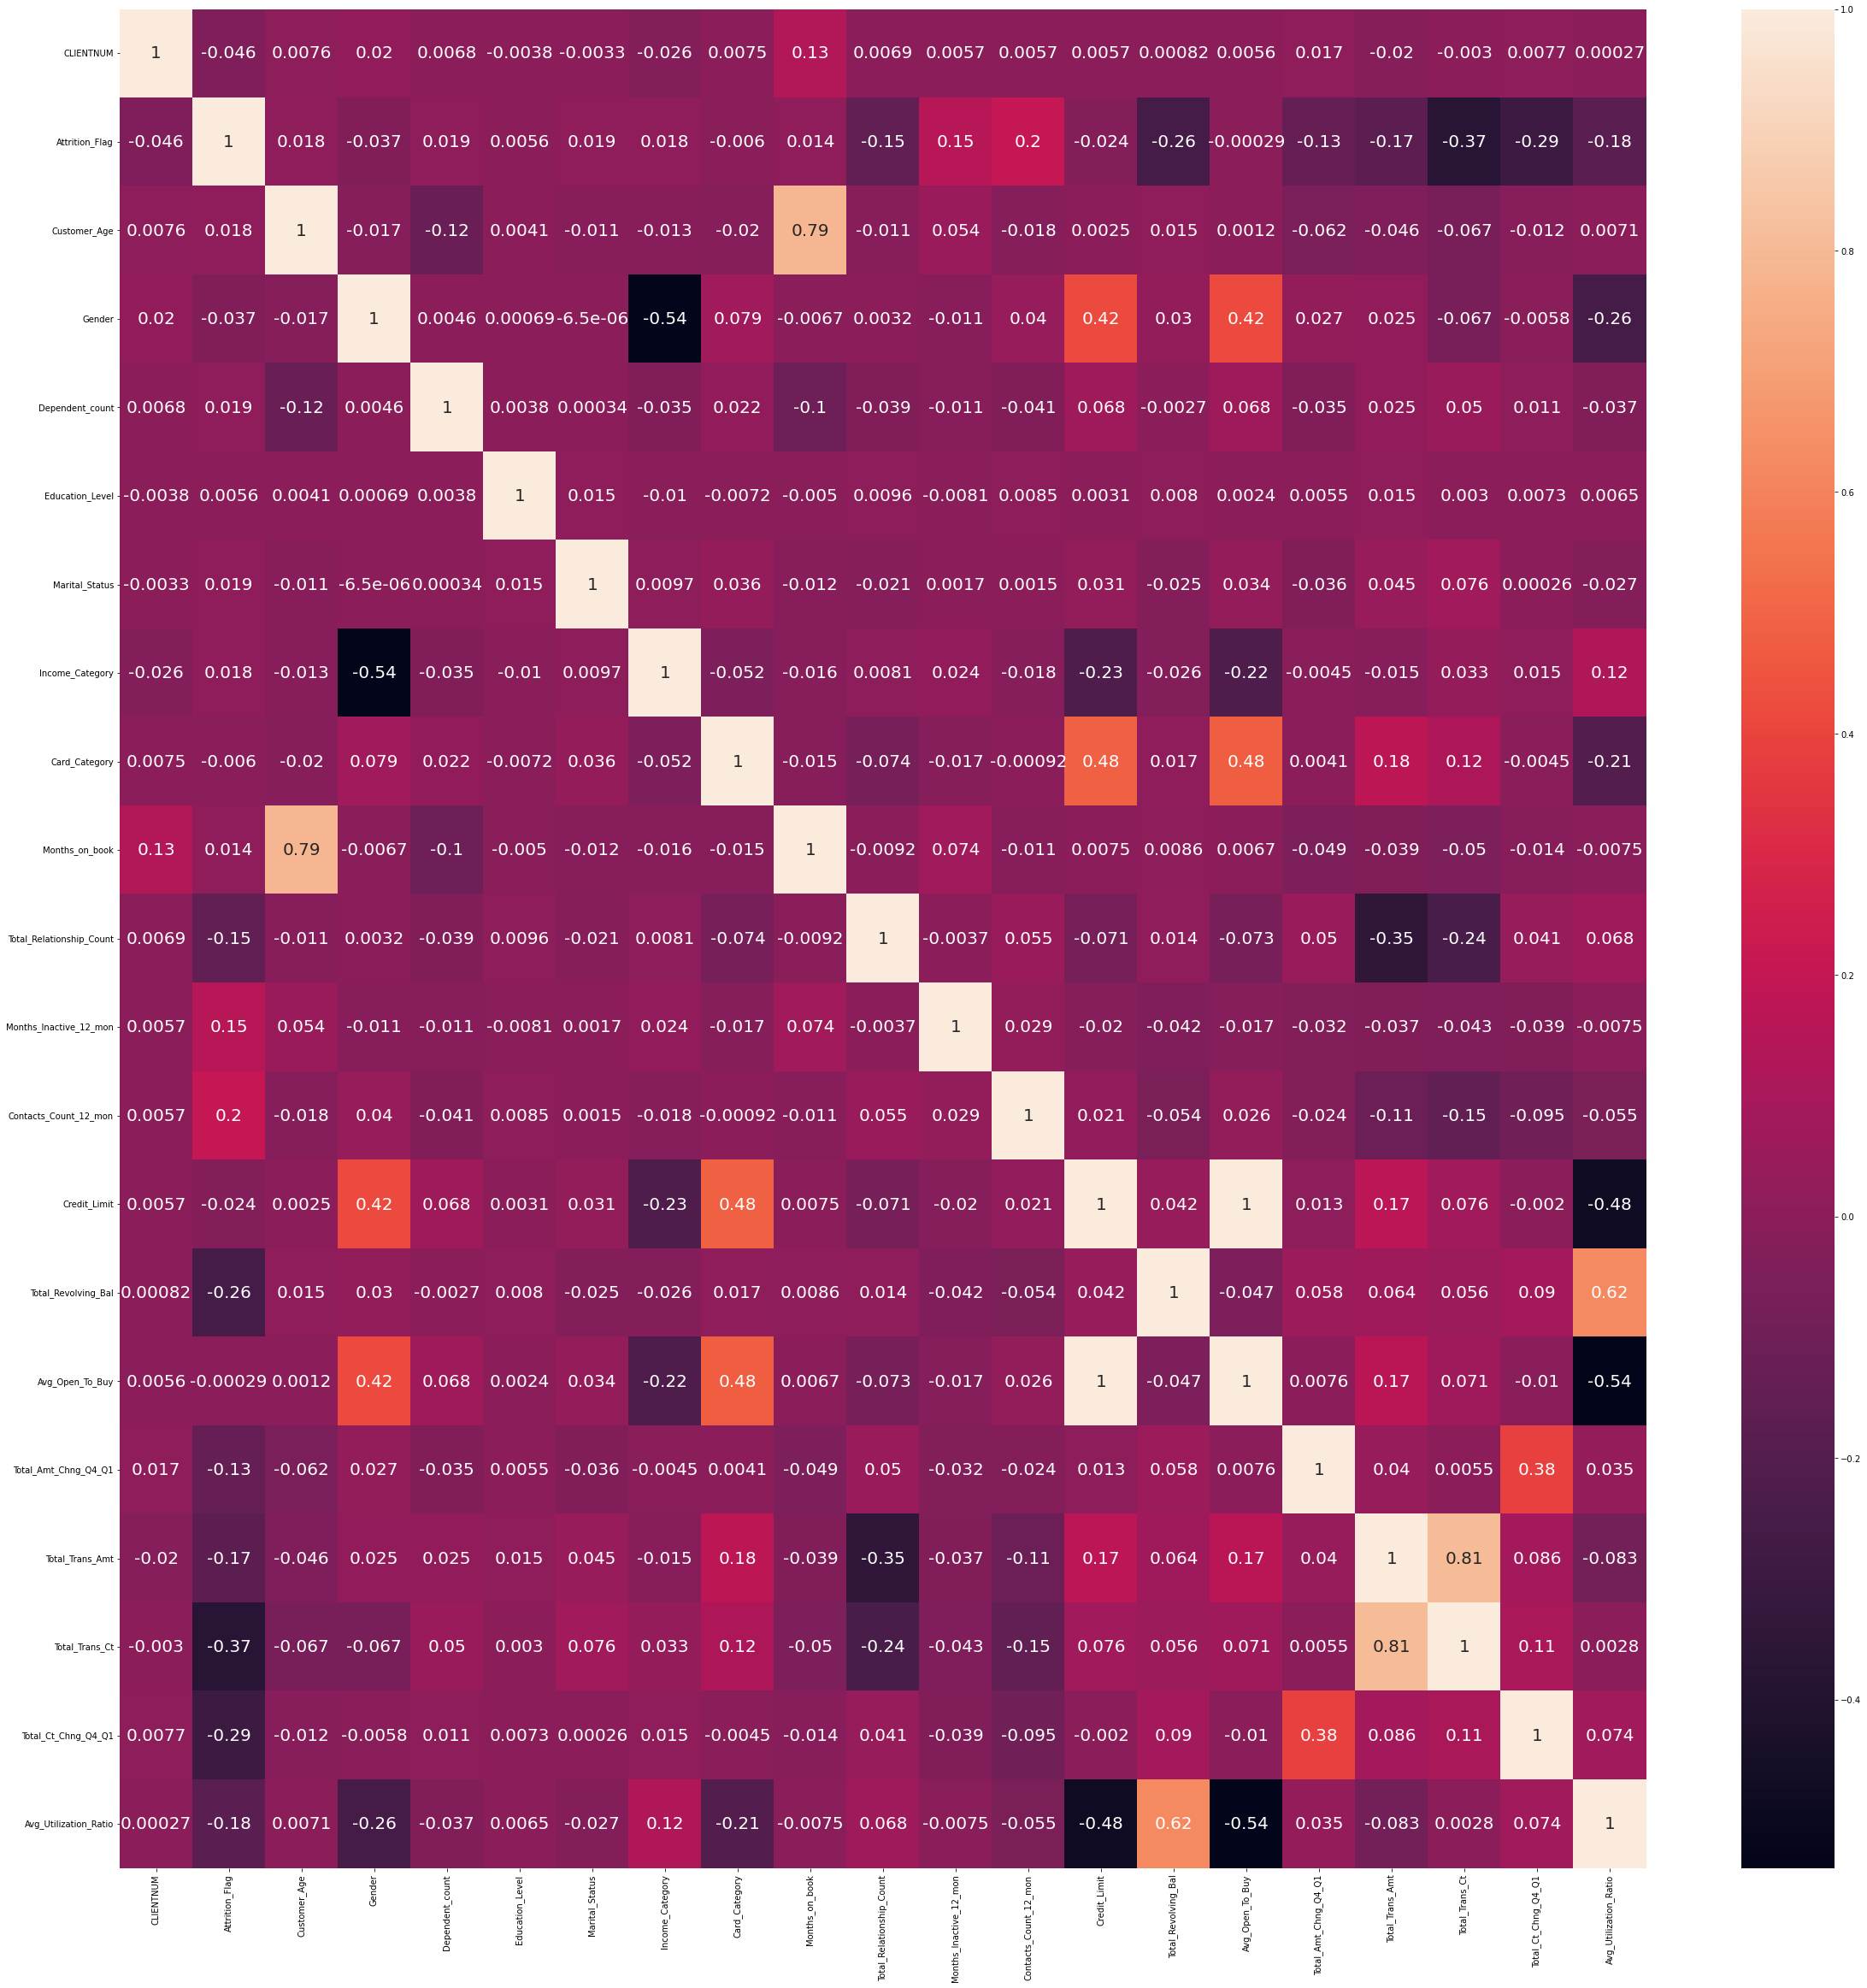

In [ ]:
plt.figure(figsize = (40,40))
sns.heatmap(data = cor, annot = True, cmap = "rocket", annot_kws = {
                'fontsize' : 20});

In [ ]:
upper = cor.where(np.triu(np.ones(cor.shape), k = 1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis = 1, inplace = True)

# **Train Test Split**

In [ ]:
X = df.drop('Attrition_Flag', axis = 1)
y = df['Attrition_Flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 19), (2026, 19), (8101,), (2026,))

# **Standardization**

In [ ]:
sc = StandardScaler()
standard_X_train = sc.fit_transform(X_train)
standard_X_test = sc.transform(X_test)

# **Model**

In [ ]:
#SVM Model
svc = SVC()
svc.fit(standard_X_train, y_train)

SVC()

In [ ]:
svc.score(standard_X_test,y_test)

0.930898321816387

In [ ]:
#KNN model
knnmodel= KNeighborsClassifier(n_neighbors = 9, metric='manhattan')
knnmodel.fit(standard_X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
knnmodel.score(standard_X_test, y_test)

0.9091806515301086

In [ ]:
# Logistic Regression model
reg = LogisticRegression(solver='liblinear', max_iter=100)
reg.fit(standard_X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
reg.score(standard_X_test, y_test)

0.903751233958539

In [ ]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(standard_X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(standard_X_test, y_test)

0.9580454096742349